# IMPORTING MODULES AND DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


## DATA CLEANING

In [3]:
df1 = df.drop(columns=['area_type', 'availability', 'society', 'balcony'])

In [4]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


### REMOVING NULL VALUES

In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df1.dropna(inplace=True)

In [8]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### FEATURE ENGINEERING

In [9]:
unique_size = df1['size'].unique()

In [10]:
unique_size

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df1['bhk'] = df1['size'].apply(lambda x : x.split(" ")[0])

In [12]:
def is_float(num):
    try:
        float(num)
    except:
        return False
    return True

In [13]:
df1[~df1['total_sqft'].apply(lambda x:is_float(x))].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [14]:
def total_sqft_avg(price_rng):
    price = price_rng.split('-')
    if len(price)==2:
        return (float(price[0])+float(price[1]))/2
    try:
        return float(price_rng)
    except:
        None

In [15]:
df1['total_sqft'] = df1['total_sqft'].apply(total_sqft_avg)

In [16]:
df1 = df1[df1.total_sqft.notnull()]
df1.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [17]:
df1['bhk'] = df1['bhk'].astype('float')

In [18]:
df1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0


In [19]:
df1.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                 4.0
Name: 30, dtype: object

In [20]:
df1['total_sqft'].dropna(inplace=True)

In [21]:
df1['price_per_sqft'] = df1 ['price'] * 100000 / df1['total_sqft']
df1.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  float64
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [23]:
len(df1['location'].unique())

1298

In [24]:
df1['location'] = df1['location'].apply(lambda x: x.strip())
location_counts = df1['location'].value_counts(ascending=False)
location_counts

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [25]:
len(location_counts[location_counts>10])

240

In [26]:
location_counts_less_than_10 = location_counts[location_counts<=10]

In [27]:
len(location_counts_less_than_10.unique())

10

In [28]:
df1['location'] = df1['location'].apply(lambda x: x if x not in location_counts_less_than_10 else 'others')
len(df1['location'].unique())

241

In [29]:
df2 = df1[~(df1['total_sqft'] / df1['bhk'] < 300)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [30]:
df2.shape

(12456, 7)

### REMOVING OUTLIERS

In [31]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mn = np.mean(subdf['price_per_sqft'])
        stdv = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (mn-stdv)) & (subdf['price_per_sqft'] < (mn+stdv))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [32]:
df3 = remove_pps_outliers(df2)
df3.shape

(10242, 7)

In [33]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_sats={}        
        for BHK,BHK_df in location_df.groupby('bhk'):            
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('bhk'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [34]:
df4 = remove_bhk_outliers(df3)
df4.shape

(7317, 7)

In [35]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (8,8)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

### VISUALIZATION

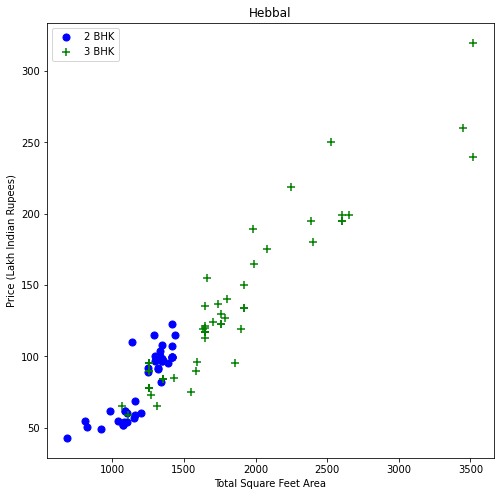

In [36]:
#SCATTERPLOT BEFORE OUTLIER REMOVAL
plot_scatter_chart(df3,'Hebbal')

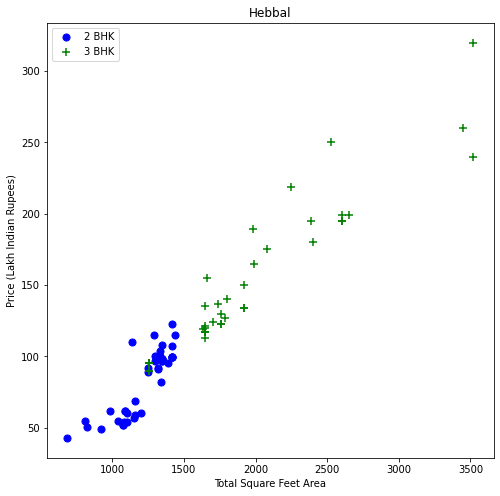

In [37]:
#SCATTERPLOT AFTER OUTLIER REMOVAL
plot_scatter_chart(df4,'Hebbal')

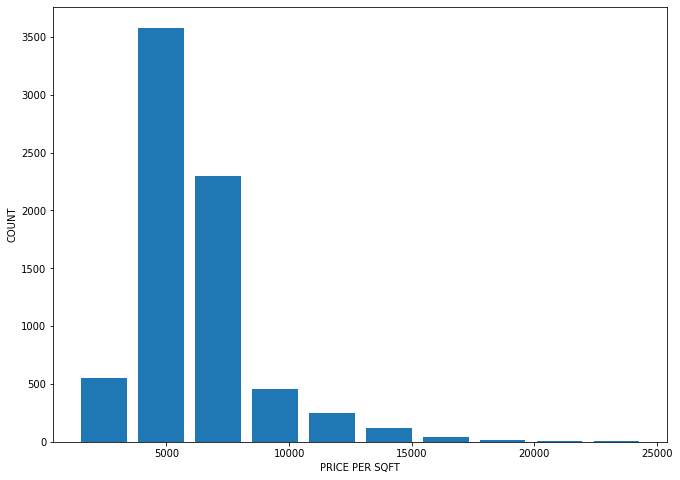

In [38]:
plt.figure(figsize=(11,8))
plt.ylabel("COUNT")
plt.xlabel("PRICE PER SQFT")
plt.hist(df4['price_per_sqft'],rwidth=0.8)
plt.show()

In [39]:
df4['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [40]:
df5 = df4[df4['bath']<df4['bhk']+2] 

In [41]:
df5.shape

(7239, 7)

In [42]:
# REMOVING UNWANTED COLUMNS
df6 = df5.drop(columns=['price_per_sqft','size'])
df6.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0


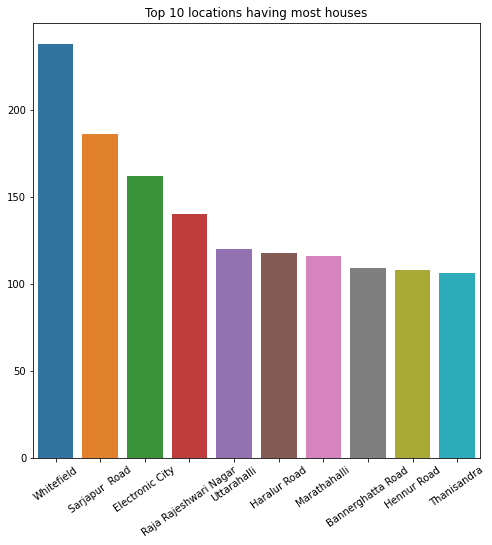

In [43]:
value = df6['location'].value_counts()[1:11].values
index = df6['location'].value_counts()[1:11].index
plt.xticks(rotation = 35)
sns.barplot(x = index, y = value)
plt.title("Top 10 locations having most houses")
plt.show()

In [44]:
location_dict = df6.groupby('location').groups
price_sum_dic = {}
price_sum = 0
for keys, values in location_dict.items():
    if keys in index:
        for i in values:
            price_sum += df6['price'].loc[i]
            
        avg_price_total = price_sum / len(values)
        price_sum_dic[keys] = avg_price_total
sorted_dic = dict(sorted(price_sum_dic.items(), key=lambda x:x[1],reverse=True))

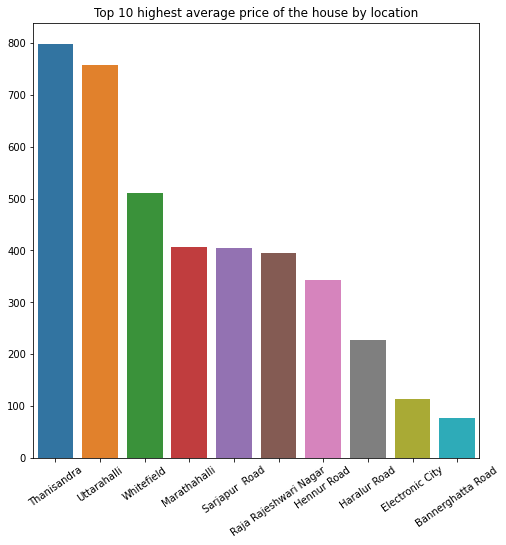

In [45]:
plt.xticks(rotation = 35)
plt.title('Top 10 highest average price of the house by location')
sns.barplot(x=list(sorted_dic.keys()), y = list(sorted_dic.values()))
plt.show()

In [46]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7239 entries, 0 to 10241
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7239 non-null   object 
 1   total_sqft  7239 non-null   float64
 2   bath        7239 non-null   float64
 3   price       7239 non-null   float64
 4   bhk         7239 non-null   float64
dtypes: float64(4), object(1)
memory usage: 597.4+ KB


In [47]:
len(df6['location'].unique())

241

### MODEL

In [48]:
dummies = pd.get_dummies(df6['location'])

In [49]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df7 = pd.concat([df6,dummies],axis=1)

In [51]:
df7.drop(columns=['others','location'],inplace=True)

In [52]:
df7

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,70.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1800.0,1.0,200.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1353.0,2.0,110.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,26.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X = df7.drop(columns = 'price')
y = df7['price']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [56]:
models = {"Lr":LinearRegression(),"Rfr":RandomForestRegressor(),"dt":DecisionTreeRegressor(),"lass0":Lasso()}

In [57]:
def scoree(X_trainn,X_testt,y_trainn,y_testt,model):
    for name, model in model.items():
        model.fit(X_trainn,y_trainn)
        score = model.score(X_testt,y_testt)
        print(f"{name} score is {score}")

In [58]:
scoree(X_train,X_test,y_train,y_test,models)

Lr score is 0.8629132245229483
Rfr score is 0.778281201200641
dt score is 0.7100480421949691
lass0 score is 0.7184797447099163


In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [60]:
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores = []
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    for algo_name, config in algos.items():
        
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.842729,{}
1,lasso,0.698179,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.711232,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [61]:
model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
model.score(X_train,y_train)

0.8629132245229483


0.8523137584485154

In [62]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    x = pd.DataFrame([x], columns=X.columns)
    return model.predict(x)[0]

In [63]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.86570258323562

In [64]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.08062284998283

In [65]:
import pickle
with open("Bangalore_house_price_prediction_model.pickle", 'wb') as f:
    pickle.dump(model,f)

In [66]:
import json
colmns = {'Data_columns':[col for col in X.columns]}
with open("columns.json",'w') as f:
    f.write(json.dumps(colmns))